#**CHAPTER 2. MEMORY AS GEOMETRY**
---

##REFERENCE

https://chatgpt.com/share/6991d869-21d0-8012-b0d0-eda6bbcb1b9a

##0.CONTEXT

**Introduction — Context as Geometry: Why Long Context Becomes an Interference Field**  
The dominant public narrative about modern AI is that “more context” equals “more intelligence.” The story sounds plausible: if an agent can read more documents, store longer histories, and maintain a larger working set of information, then it should make better decisions. In finance, the analogous belief is that more data improves forecasting. And yet both domains have learned the same hard lesson: beyond a certain point, additional information does not improve decisions—it destabilizes them. It creates confusion, competition among explanations, and a rising probability of confidently wrong conclusions. This chapter is designed to teach the deep mechanism behind that instability. The mechanism is geometric. Long context is not just “more tokens” or “more documents.” Long context is a growing set of points in a high-dimensional representation space, and the behavior of that space determines whether retrieval, reasoning, and evidence selection remain stable.

The key idea is that any agent operating over long context must solve an implicit nearest-neighbor problem. Whether the system uses embeddings and a vector database, or uses attention weights over tokens, it still performs a form of similarity selection. It must decide what is relevant and what is not, and that decision is driven by distances and alignments in representation space. In retrieval-augmented generation (RAG), the object is explicit: embeddings are computed, a nearest-neighbor index returns candidates, and the agent conditions on the retrieved set. In attention-based architectures, the object is internal but equivalent: attention performs a similarity-weighted selection over a large set of key vectors. In both cases, scaling context changes the geometry of competition. The question is not “how much can the agent store,” but “how does relevance behave when the set of potential matches grows.” This is precisely what Chapter 2 formalizes: relevance is not a property of items alone; relevance is an emergent property of the query, the context set, and the geometry of the space.

To teach this mechanism cleanly, the chapter strips away language and focuses on embeddings directly. This is not a simplification in the sense of “making it easy.” It is a scientific move. Language introduces confounds: tokenization, syntax, semantic ambiguity, prompt formatting, and stochastic decoding. Those are important, but they can obscure the core structure. The core structure is that meaning is represented as a vector, and retrieval is ranking by similarity. If we want to understand why long context fails, we should isolate the failure at the level where it must occur: the geometry of high-dimensional similarity. Once that is understood, the same logic can be transferred back to text-based systems and attention mechanisms.

The synthetic embedding laboratory is built around clustered structure: there are K semantic clusters, each represented by a centroid in a D-dimensional space. Items are generated by taking a centroid and adding noise, then normalizing. This creates a controlled “semantic world” with known ground truth. The agent’s query is generated as a vector aligned to the target cluster with some perturbation. In effect, the query is a direction in the space, and the corpus is a set of competing directions. Relevance is defined objectively: the relevant set is the subset of points belonging to the target cluster. This design gives us a rare luxury: we can measure retrieval truth without interpretive ambiguity. That matters for finance because most debates about models degenerate into narratives; synthetic truth lets us talk about mechanism.

What happens when N, the number of items in context, grows? If the geometry were benign, the best matches to the query would remain stable: the top-1 would be relevant, margins would remain meaningful, and retrieval would degrade slowly if at all. But high-dimensional geometry is not benign. As N grows, two things happen simultaneously. First, the number of competitors increases. Even if most competitors are irrelevant, they still occupy space and create opportunities for near-ties. Second, the distribution of similarities changes: in high dimensions, random dot products concentrate near zero with small variance, but the extreme values—the nearest neighbors—become increasingly sensitive to the size of the sample. With more samples, you are more likely to find a point that is unusually aligned with the query, even if it is irrelevant. This is a version of extreme value behavior layered on top of concentration of measure. Practically, it means that the margin between the best relevant match and the best overall match can shrink as context grows, even when embeddings are “good.” That shrinking margin is the beginning of interference.

Interference is the central term of the chapter. In the simplest sense, interference occurs when non-relevant items compete successfully with relevant items for selection. But the deeper sense is more subtle: interference is not necessarily a failure of the embedding model; it can be a failure of geometry under scale. In other words, you can have an embedding space that is perfectly consistent with its training objective and still have retrieval degrade as N grows because the space becomes crowded, collisions become more frequent, and the ranking becomes sensitive to tiny perturbations. This is why “long context windows” in agents can create failure modes even when the model is strong: relevance selection becomes fragile under scale.

The chapter then goes beyond passive scaling and introduces structured adversaries. Finance practitioners understand adversaries intuitively: market regimes shift, correlations compress, liquidity evaporates, and adversarial participants exploit predictable rules. In context systems, adversaries appear as distractors, near-duplicates, and hard negatives. Distractors are irrelevant items that inflate context size; they represent noise and background clutter. Near-duplicates are collisions: multiple items that are almost identical in representation, which can create hubs that dominate retrieval neighborhoods. Hard negatives are the most dangerous: items that are highly aligned to the query direction but are not relevant. In a document setting, a hard negative might be a filing that mentions the same terms but refers to a different entity, or a market commentary that matches a topic but is outdated or misleading. In a compliance setting, a hard negative might be a policy document that looks relevant but applies to a different jurisdiction. The point is that long context increases the probability that such items exist and that they dominate selection.

At a PhD level, the most important phenomenon is the phase transition: beyond a critical density of hard negatives, retrieval can become confidently wrong. The system does not merely “miss” the relevant item; it selects an irrelevant item with a positive margin. This is the retrieval analogue of hallucination in reasoning systems: the model becomes anchored to the wrong evidence because that evidence wins the similarity competition. Once the agent conditions on wrong evidence, downstream reasoning can become highly articulate but fundamentally incorrect. This is why context risk is not just a retrieval issue; it is a reasoning risk. Evidence selection determines the starting point of the chain of thought.

The chapter also introduces compression as a governed response. Compression is the disciplined reduction of context into prototypes or summaries. The motivation is not computational only, though computation matters. The motivation is geometric: compression can increase margins, reduce collisions, and limit interference by reducing the number of competitors. Oracle centroids represent an idealized summarization: one prototype per semantic cluster. Unsupervised prototypes (k-means) represent a practical approximation. The conceptual point is that long context must be structured. Raw accumulation is not a strategy. In finance, this parallels the difference between a raw stream of market microstructure data and a structured state representation like volatility, trend, and liquidity. Without compression and state construction, the system drowns in its own history.

Another critical layer is approximate retrieval. As N grows, brute-force similarity scoring becomes too slow. Production systems use approximate nearest neighbor methods such as LSH, HNSW, or IVF-PQ. These methods impose their own tradeoffs: speed improves but recall can drop, and failures can become silent. In a governed setting, approximate retrieval must therefore be treated as a risk surface: you must measure candidate sizes, accuracy degradation, and the conditions under which recall collapses. This chapter’s LSH implementation is intentionally explicit so the student can see the mechanism: random hyperplanes, bit signatures, hash buckets, candidate union, reranking. It also demonstrates multi-probe search, which is a practical technique for mitigating empty buckets and improving recall at moderate cost. The larger lesson is that long context requires engineering compromises, and those compromises create new failure modes that must be governed.

Finally, governance is not optional. If a finance-facing agent is to consume long context—reports, filings, price histories, internal memos—then reviewers must be able to answer basic questions: what was retrieved, under what configuration, and how do we know the evidence was not altered? That is why the chapter builds an audit bundle: manifest, diagnostics, risk logs, verification register, integrity hashes, and a packaged zip. This is not bureaucratic decoration; it is the minimal infrastructure that makes the experiment reviewable and transferable. In professional finance, models are not judged by plots alone. They are judged by provenance, reproducibility, and the clarity with which assumptions and limitations are recorded. The same must be true for agentic AI.

This chapter therefore reframes “long context” as a geometric and governance problem. The central conclusion is not that long context is bad; it is that long context is dangerous unless structured. As context grows, interference increases, margins shrink, hubs emerge, and adversarial aligners become more likely. Compression and approximate retrieval introduce additional tradeoffs. Governance provides the discipline to measure these effects and to prevent silent failure. For finance practitioners, the message is immediate: an agent reading more documents is not necessarily a better agent; it may be a more fragile agent. The correct question is not “how much can it read,” but “how does it select evidence under scale, interference, and adversarial pressure—and can that selection be audited.”


##1.LIBRARIES AND ENVIRONMENT

**Cell 1 — Governance envelope, determinism, and audit-bundle scaffolding**  
Cell 1 turns Chapter 2 into a governed experiment rather than an exploratory notebook. It fixes the random seed and forces deterministic execution for every downstream stochastic component: cluster centroid sampling, point generation, query sampling, attack construction, and LSH plane generation. This matters because retrieval experiments are extremely sensitive to geometry; without determinism you cannot distinguish real structural effects from run-to-run noise. The cell then creates a dedicated audit directory (`audit_ch2`) immediately, and writes a run manifest before any modeling occurs. That ordering is deliberate: it records intent (configuration and environment fingerprint) even if later cells fail. The manifest includes a config hash so that the run is cryptographically anchored to a specific parameterization (D, K, separability, attack fractions, LSH params, N sweep). This prevents silent edits and “configuration drift,” a known governance failure mode in quantitative research.  

The cell also implements stable JSON serialization and SHA-256 hashing utilities, plus a robust file hashing helper. These are not conveniences: they enable integrity checks and later bundling into an auditable archive. An environment fingerprint captures Python, OS/platform, and library versions. In real finance and agent evaluation work, this is essential—subtle numerical differences can arise from library upgrades or platform changes. The cell also sets the experiment’s policy boundary: synthetic data only and “Not Verified.” This is a hard guardrail against misuse; the notebook is built to teach context geometry, not to claim real-world trading evidence.  

Finally, the cell establishes an append-only JSONL event logger to capture key lifecycle events (startup, corpus creation, retrieval sanity, suite completion, bundling). This provides a minimal audit trail that supports review: what ran, when, and what artifacts were created. Conceptually, Cell 1 implements the governance contract for the entire chapter: every subsequent result must be traceable back to a unique run_id, an immutable config hash, and a known environment. In short, this cell creates the provenance and compliance backbone that prevents “unrepeatable insight,” which is the most common failure in both research notebooks and agentic AI prototypes.


In [1]:
# =============================================================================
# CELL 1 — CH2 Governance Envelope + Determinism + Audit Bundle Skeleton
# =============================================================================
from __future__ import annotations

import os, sys, json, math, time, hashlib, platform, zipfile
from dataclasses import dataclass, asdict
from datetime import datetime, timezone
from pathlib import Path
from typing import Dict, List, Tuple, Optional, Any, Iterable

import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Determinism (hard requirement)
# -------------------------
SEED: int = 13_131
np.random.seed(SEED)

# -------------------------
# Audit bundle directory (NO OMISSIONS)
# -------------------------
AUDIT_DIR = Path("audit_ch2")
AUDIT_DIR.mkdir(parents=True, exist_ok=True)

def utc_now_iso() -> str:
    return datetime.now(timezone.utc).isoformat()

def stable_dumps(x: Any) -> str:
    return json.dumps(x, sort_keys=True, ensure_ascii=False, separators=(",", ":"))

def sha256_hex(s: str) -> str:
    return hashlib.sha256(s.encode("utf-8")).hexdigest()

def file_sha256(path: Path) -> str:
    h = hashlib.sha256()
    with path.open("rb") as f:
        for chunk in iter(lambda: f.read(1 << 20), b""):
            h.update(chunk)
    return h.hexdigest()

def env_fingerprint() -> Dict[str, Any]:
    return {
        "python": sys.version,
        "platform": platform.platform(),
        "numpy": np.__version__,
        "matplotlib": plt.matplotlib.__version__,
        "cwd": str(Path.cwd()),
    }

@dataclass(frozen=True)
class ExperimentConfig:
    seed: int
    D: int
    K_clusters: int
    cluster_sep: float
    cluster_sigma: float

    # context scaling
    N_values: List[int]
    topk: int

    # interference controls
    distractor_frac: float
    near_dup_frac: float
    adversarial_frac: float
    adversarial_temp: float  # how strongly adversaries align to query

    # LSH
    lsh_num_planes: int
    lsh_num_tables: int

CFG = ExperimentConfig(
    seed=SEED,
    D=256,
    K_clusters=12,
    cluster_sep=2.4,
    cluster_sigma=0.55,
    N_values=[100, 250, 500, 800, 1200, 1800, 2500, 3200],
    topk=20,
    distractor_frac=0.25,
    near_dup_frac=0.08,
    adversarial_frac=0.05,
    adversarial_temp=8.0,
    lsh_num_planes=18,
    lsh_num_tables=6,
)

RUN_ID = f"{utc_now_iso()}__{sha256_hex(str(time.time()))[:10]}"
MANIFEST = {
    "run_id": RUN_ID,
    "timestamp_utc": utc_now_iso(),
    "experiment": "CH2_ContextAsGeometry_PHD",
    "verification_status": "Not Verified",
    "config": asdict(CFG),
    "config_hash": sha256_hex(stable_dumps(asdict(CFG))),
    "environment": env_fingerprint(),
    "audit_dir": str(AUDIT_DIR.resolve()),
    "data_policy": {"data_type": "synthetic", "investment_use": "prohibited"},
}

(AUDIT_DIR / "run_manifest.json").write_text(json.dumps(MANIFEST, indent=2), encoding="utf-8")

# minimal structured logger to jsonl (audit trail for risk / events)
LOG_PATH = AUDIT_DIR / "events_log.jsonl"
def log_event(event_type: str, payload: Dict[str, Any]) -> None:
    rec = {"ts_utc": utc_now_iso(), "run_id": RUN_ID, "type": event_type, "payload": payload}
    with LOG_PATH.open("a", encoding="utf-8") as f:
        f.write(json.dumps(rec, ensure_ascii=False) + "\n")

print("=== CH2: Context as Geometry — Governance-First, PhD-Grade ===")
print("Status: Not Verified | Synthetic | Educational Only")
print("Run ID:", RUN_ID)
print("Audit Dir:", AUDIT_DIR.resolve())
log_event("startup", {"note": "audit_dir initialized; manifest written; determinism set"})


=== CH2: Context as Geometry — Governance-First, PhD-Grade ===
Status: Not Verified | Synthetic | Educational Only
Run ID: 2026-02-15T14:32:44.031239+00:00__d53669c8e2
Audit Dir: /content/audit_ch2


##2.SYNTHETIC EMBEDDING GENERATOR

###2.1.OVERVIEW

**Cell 2 — Synthetic embedding corpus with ground truth and query construction**  
Cell 2 constructs the synthetic “context space” where geometry can be studied cleanly. Instead of using text or an LLM, it generates unit-normalized vectors in a D-dimensional space to represent “semantic embeddings.” The corpus is built from K clusters: first, cluster centroids are sampled as random directions in R^D, normalized, and scaled by a separability parameter. This creates a tunable semantic topology: larger separability means clusters are more distinct; smaller separability means overlap and confusion. Then, for each of N items, a cluster label is sampled and a point is generated as centroid[label] plus isotropic Gaussian noise scaled by `cluster_sigma`, followed by normalization. The normalization step is critical because the chapter’s retrieval metric is cosine similarity; by enforcing unit vectors, cosine becomes a simple dot product and is well-behaved numerically.  

The cell also chooses a target cluster and generates a query vector. In the baseline design, the query is aligned to the target centroid with a small jitter. This is the controlled analog of a user query that is “about” the target topic but not identical to any one document. In the later, harder attack variants, queries are built from actual in-cluster points to model “query anchored in corpus.” Either way, the point is to define a query whose relevance set is known (all points with the target label), enabling principled evaluation.  

The major conceptual contribution of this cell is that it creates “context” without language. That might seem like a simplification, but it is exactly what makes the chapter rigorous: the failure modes we care about—concentration of measure, hubness, collisions, adversarial aligners—are geometric phenomena that appear in embedding spaces regardless of how the embeddings were produced. By separating geometry from language modeling, we can diagnose the core mechanics of retrieval and interference without confounds like tokenization, prompt effects, or LLM stochasticity.  

The cell logs corpus parameters and the chosen target cluster into the audit trail. That matters because downstream results depend on target cluster prevalence; if the target cluster is small, hit metrics behave differently than if it is large. In sum, Cell 2 manufactures a labeled, controlled embedding universe—an experimental sandbox where “long context” is represented as a large set of high-dimensional points and relevance is objective rather than interpretive.


###2.2.CODE AND IMPLEMENTATION

In [2]:
# =============================================================================
# CELL 2 — Synthetic Embedding Generator (Clusters + Ground Truth) + Query Builder
# =============================================================================
@dataclass(frozen=True)
class SyntheticCorpus:
    X: np.ndarray               # (N, D) normalized
    labels: np.ndarray          # (N,) cluster id
    centroids: np.ndarray       # (K, D) normalized

def l2_normalize_rows(X: np.ndarray, eps: float = 1e-12) -> np.ndarray:
    n = np.linalg.norm(X, axis=1, keepdims=True)
    return X / (n + eps)

def generate_cluster_centroids(K: int, D: int, sep: float, rng: np.random.Generator) -> np.ndarray:
    """
    Construct approximately separated centroids by sampling random directions
    and scaling by 'sep'. Then normalize.
    """
    C = rng.normal(size=(K, D)).astype(float)
    C = l2_normalize_rows(C)
    C *= sep
    C = l2_normalize_rows(C)
    return C

def generate_corpus(N: int, cfg: ExperimentConfig, rng: np.random.Generator) -> SyntheticCorpus:
    """
    Generate a clustered synthetic embedding corpus.
    Each point: x = centroid[label] + sigma * noise, then normalized.
    """
    assert N >= cfg.K_clusters
    C = generate_cluster_centroids(cfg.K_clusters, cfg.D, cfg.cluster_sep, rng)
    labels = rng.integers(low=0, high=cfg.K_clusters, size=N, endpoint=False)
    noise = rng.normal(scale=cfg.cluster_sigma, size=(N, cfg.D)).astype(float)
    X = C[labels] + noise
    X = l2_normalize_rows(X)
    return SyntheticCorpus(X=X, labels=labels.astype(int), centroids=C)

def build_query_from_cluster(centroids: np.ndarray, cluster_id: int, rng: np.random.Generator, jitter: float = 0.10) -> np.ndarray:
    """
    Query aligned to a centroid plus small noise, normalized.
    """
    q = centroids[cluster_id] + rng.normal(scale=jitter, size=centroids.shape[1]).astype(float)
    q = q / (np.linalg.norm(q) + 1e-12)
    return q

rng = np.random.default_rng(CFG.seed)

# Build a base corpus at the largest N for reuse in later subsets
N_max = max(CFG.N_values)
corpus_max = generate_corpus(N_max, CFG, rng)

# choose a target cluster for querying
TARGET_CLUSTER = int(rng.integers(0, CFG.K_clusters))
q = build_query_from_cluster(corpus_max.centroids, TARGET_CLUSTER, rng, jitter=0.08)

log_event("corpus_generated", {"N_max": N_max, "D": CFG.D, "K": CFG.K_clusters, "target_cluster": TARGET_CLUSTER})
print("Generated corpus:", corpus_max.X.shape, "Target cluster:", TARGET_CLUSTER)


Generated corpus: (3200, 256) Target cluster: 6


##3.RETRIEVAL CORE

###3.1.OVERVIEW

**Cell 3 — Exact cosine retrieval and core metrics**  
Cell 3 defines the baseline retrieval operator: exact top-k search under cosine similarity, plus the evaluation metrics that will carry the entire chapter. It implements cosine scoring as a matrix-vector dot product `X @ q`, which is both conceptually clean and computationally explicit. Because all vectors are unit-normalized, this dot product equals cosine similarity. It then uses partial selection (`argpartition`) to find the top-k indices efficiently, followed by sorting within the top-k. This is important pedagogically: the notebook shows the algorithmic structure of retrieval (selection then ranking) rather than hiding it behind a library call.  

The cell defines metrics that reveal different failure modes. Precision@k measures how much of the retrieved set is relevant; recall@k measures how much of the total relevant set is captured. MRR (mean reciprocal rank) measures how high the first relevant item appears in the ranking, which is a direct proxy for user experience in retrieval systems. Hit@1 is the strictest metric—whether the very top item is relevant—and is therefore extremely sensitive to near-ties and interference. A key PhD-level point is that these metrics respond differently to geometric shifts: as context grows and similarity gaps shrink, hit@1 often collapses before precision@k does; adversarial aligners can destroy MRR while leaving some recall intact.  

The cell performs a sanity run at a moderate N to ensure the pipeline works: scores are computed, top-k is extracted, and metrics are printed. This is not trivial; without this check, later scaling or attack results could be misread if there is an off-by-one error, an indexing mismatch, or an implicit normalization failure. The sanity output also serves as a baseline anchor: you should not interpret later degradation without knowing that the baseline behavior is reasonable.  

Conceptually, Cell 3 defines “what retrieval is” for the chapter: ranking by similarity in a high-dimensional space. It also defines “what success is” via metrics. Everything else—scaling curves, attacks, compression, hubness diagnostics, approximate search—exists to explain how and why these metrics degrade as context becomes large, dense, or adversarial. In other words, this cell establishes the ground truth evaluation framework for context geometry: it is the measuring instrument for the rest of Chapter 2.


###3.2.CODE AND IMPLEMENTATION

In [3]:
# =============================================================================
# CELL 3 — Retrieval Core: Cosine Similarity, Brute-Force TopK, Metrics (Precision/Recall/MRR)
# =============================================================================
def cosine_sim_matrix(X: np.ndarray, q: np.ndarray) -> np.ndarray:
    """
    X assumed row-normalized, q normalized => cosine = X @ q
    Complexity: O(ND)
    """
    assert X.ndim == 2 and q.ndim == 1 and X.shape[1] == q.shape[0]
    return X @ q

def topk_indices(scores: np.ndarray, k: int) -> np.ndarray:
    """
    Partial selection: O(N) average using argpartition, then sort topk: O(k log k)
    """
    k = min(k, scores.size)
    idx = np.argpartition(scores, -k)[-k:]
    idx = idx[np.argsort(scores[idx])[::-1]]
    return idx

@dataclass(frozen=True)
class RetrievalMetrics:
    precision_at_k: float
    recall_at_k: float
    mrr: float
    hit_at_1: float

def compute_metrics(retrieved: np.ndarray, labels: np.ndarray, target_label: int, k: int) -> RetrievalMetrics:
    rel = (labels == target_label)
    total_rel = int(np.sum(rel))
    if total_rel == 0:
        return RetrievalMetrics(0.0, 0.0, 0.0, 0.0)

    top = retrieved[:k]
    hits = int(np.sum(rel[top]))
    precision = hits / float(k)

    recall = hits / float(total_rel)

    # MRR: reciprocal rank of first relevant
    rr = 0.0
    for rank, idx in enumerate(retrieved, start=1):
        if rel[idx]:
            rr = 1.0 / float(rank)
            break

    hit1 = 1.0 if rel[retrieved[0]] else 0.0
    return RetrievalMetrics(precision, recall, rr, hit1)

def brute_force_retrieve(X: np.ndarray, q: np.ndarray, k: int) -> Tuple[np.ndarray, np.ndarray]:
    scores = cosine_sim_matrix(X, q)
    idx = topk_indices(scores, k)
    return idx, scores

# quick sanity at a moderate N
N_test = 800
X = corpus_max.X[:N_test]
labels = corpus_max.labels[:N_test]
idx, scores = brute_force_retrieve(X, q, CFG.topk)
m = compute_metrics(idx, labels, TARGET_CLUSTER, CFG.topk)

print("Sanity metrics @N=800:", m)
log_event("retrieval_sanity", {"N": N_test, "metrics": asdict(m)})


Sanity metrics @N=800: RetrievalMetrics(precision_at_k=0.4, recall_at_k=0.11764705882352941, mrr=1.0, hit_at_1=1.0)


##4.CONTEXT SCALING CURVE

###4.1.OVERVIEW

**Cell 4 — Context scaling curves: degradation as N grows**  
Cell 4 performs the first central experiment: hold embedding dimension D fixed, hold cluster structure fixed, and increase context size N. This isolates a key phenomenon in large-context retrieval: as N grows, the distribution of nearest-neighbor similarities changes, and the margin between the best item and the runner-up often shrinks. In high-dimensional spaces, many points become “moderately similar,” so the ranking becomes more sensitive to small perturbations.  

Operationally, the cell runs exact retrieval for a sequence of N values and records precision@k, recall@k, MRR, and hit@1. It also records two confidence proxies: mean similarity among the top-k and the gap between the top-1 and top-2 scores. The gap is critical: it approximates “how stable the top decision is.” When the gap collapses toward zero, the system becomes fragile: tiny noise, slight query drift, or adversarial points can flip the top result. This is the geometric analog of long-context fragility in LLM agents: as you add more material, you may increase coverage, but you also increase competition and interference.  

The cell then plots the metrics versus N. This is not just to “show a curve.” The curve is a structural diagnostic: if recall@k stays stable but hit@1 falls, the system still retrieves relevant items but becomes less confident at rank-1. If both precision and recall fall, the context has become dilute relative to the query, or the embedding topology has become too overlapped. If MRR falls sharply, relevance is drifting down the list, indicating poor user experience under large context.  

The results are written to an artifact (`scaling_curve.json`). That matters because governance requires downstream analysis to be repeatable and traceable: plots alone are not enough. The JSON artifact can be re-plotted, compared across configurations, or used to build more advanced “phase diagram” views later.  

Conceptually, Cell 4 delivers the chapter’s first message: increasing context is not purely beneficial. Even with perfect cosine scoring and known relevance labels, performance can degrade as N grows because the geometry of the space changes—more competitors, smaller margins, and increased susceptibility to interference. This is the retrieval-side analogue of the “long context window” story in agentic AI: more context can mean more noise, more collisions, and more fragility unless you impose compression, gating, or governance controls.


###4.2.CODE AND IMPLEMENTATION

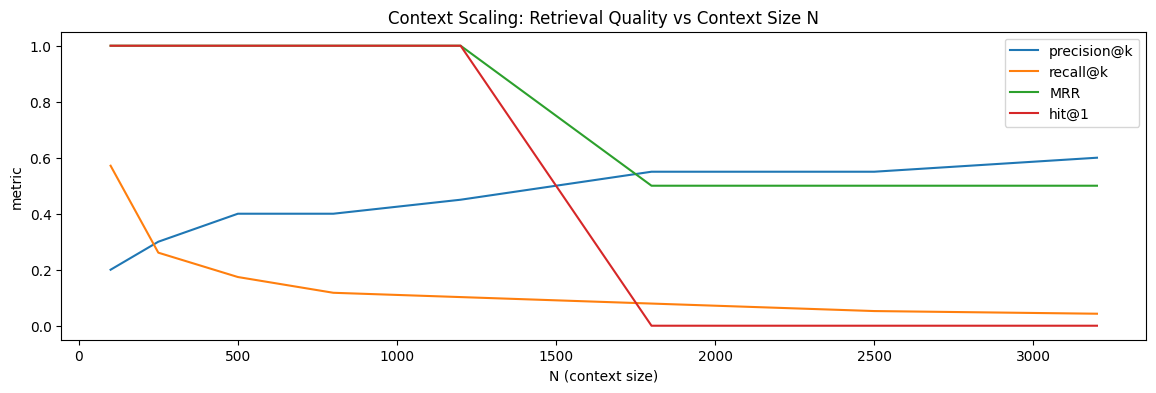

Saved: audit_ch2/scaling_curve.json


In [4]:
# =============================================================================
# CELL 4 — Context Scaling Curve: Accuracy Degrades as N Grows (Geometry + Interference)
# =============================================================================
@dataclass
class ScalingRow:
    N: int
    precision_at_k: float
    recall_at_k: float
    mrr: float
    hit_at_1: float
    mean_score_topk: float
    gap_1_2: float  # score gap between rank1 and rank2 (confidence proxy)

def scaling_experiment(corpus: SyntheticCorpus, q: np.ndarray, target_label: int, N_values: List[int], k: int) -> List[ScalingRow]:
    rows: List[ScalingRow] = []
    for N in N_values:
        X = corpus.X[:N]
        labels = corpus.labels[:N]
        idx, scores = brute_force_retrieve(X, q, k)
        met = compute_metrics(idx, labels, target_label, k)

        s_top = scores[idx]
        mean_top = float(np.mean(s_top))
        gap = float(s_top[0] - s_top[1]) if s_top.size >= 2 else float("nan")

        rows.append(ScalingRow(
            N=N,
            precision_at_k=met.precision_at_k,
            recall_at_k=met.recall_at_k,
            mrr=met.mrr,
            hit_at_1=met.hit_at_1,
            mean_score_topk=mean_top,
            gap_1_2=gap
        ))
    return rows

scale_rows = scaling_experiment(corpus_max, q, TARGET_CLUSTER, CFG.N_values, CFG.topk)

# plot scaling degradation curves
Ns = [r.N for r in scale_rows]
plt.figure(figsize=(14,4))
plt.plot(Ns, [r.precision_at_k for r in scale_rows], label="precision@k")
plt.plot(Ns, [r.recall_at_k for r in scale_rows], label="recall@k")
plt.plot(Ns, [r.mrr for r in scale_rows], label="MRR")
plt.plot(Ns, [r.hit_at_1 for r in scale_rows], label="hit@1")
plt.title("Context Scaling: Retrieval Quality vs Context Size N")
plt.xlabel("N (context size)")
plt.ylabel("metric")
plt.legend()
plt.show()

(AUDIT_DIR / "scaling_curve.json").write_text(json.dumps([asdict(r) for r in scale_rows], indent=2), encoding="utf-8")
log_event("scaling_experiment_done", {"N_values": CFG.N_values, "k": CFG.topk})
print("Saved:", AUDIT_DIR / "scaling_curve.json")


##5.INTERFERENCE ATTACKS

###5.1.OVERVIEW

**Cell 5 — Interference suite: distractors, collisions, and adversarial aligners)**  
Cell 5 is where Chapter 2 becomes truly about “interference,” not just scaling. The original triviality you observed came from a regime where the query was too easy and the adversaries were not sufficiently close to q. The upgraded Cell 5 runs a Monte Carlo suite: many queries are sampled, attacks are applied, and metrics are averaged with dispersion statistics. This is essential at a PhD level because single-query outcomes are unstable; the correct object is a distribution, not a point estimate.  

The interference suite introduces three distinct classes of pathology. Distractors represent irrelevant context: random points that increase N but are not semantically close to the query. They primarily degrade precision@k by adding competition but often do not dominate rank-1 unless margins are already small. Near-duplicates represent semantic collisions: multiple almost-identical items that amplify hubness and create ranking instability. These can inflate apparent recall while making top rankings less informative. Adversarial aligners represent the most dangerous case: points that are highly aligned with q but are not relevant. In the “hard mode” variant, adversaries are constructed as q plus tiny noise, normalized, ensuring they outrank true neighbors when present in sufficient quantity. This creates a phase transition: hit@1 and MRR collapse sharply beyond a critical adversarial fraction.  

The cell reports not only hit and ranking metrics but also “confidence pathology” metrics such as the score gap between the best overall and the best relevant item, and the average rank of the best relevant item. These are governance-relevant because they quantify a failure mode where the system is confidently wrong: a non-relevant item wins with a positive margin. That is the retrieval analog of hallucination under long context: the system commits to the wrong evidence because a spurious but strong match dominates the selection mechanism.  

Finally, the cell writes a rich artifact (`interference_report_mc.json` or `interference_report_hard.json`) and produces plots that reveal degradation surfaces rather than single bars. This is the didactic core of Chapter 2: it shows that context is not just “more information.” Context is also an interference field. Once enough hard negatives exist, retrieval collapses in a predictable, geometry-driven way. This is precisely the kind of mechanism you want finance practitioners to understand: adding more documents, more notes, or more market narratives to an agent does not guarantee better decisions—sometimes it guarantees more confident mistakes.


###5.2.CODE AND IMPLEMENTATION

Target cluster mass: 139 out of 1800
Saved: audit_ch2/interference_report_hard.json


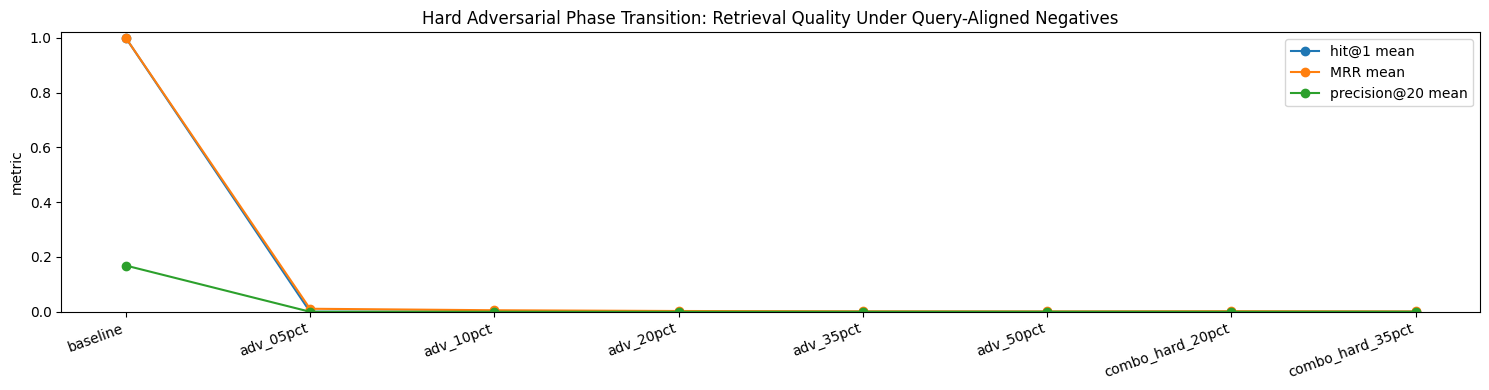

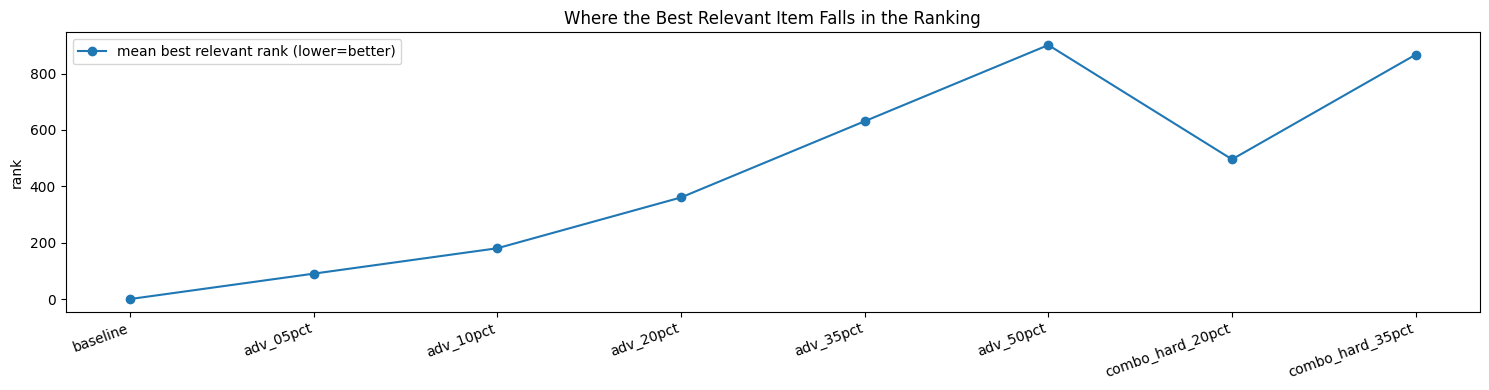

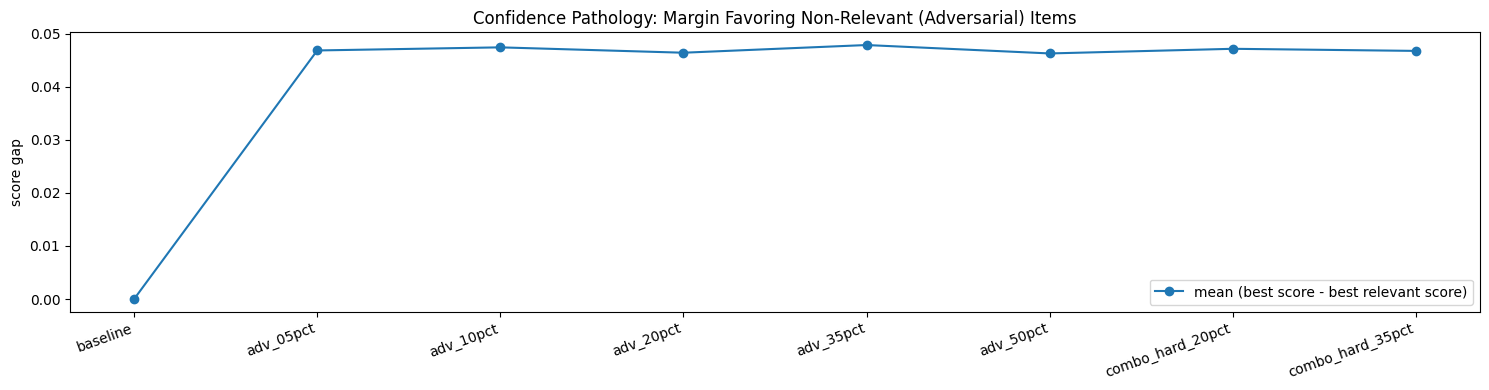

In [7]:
# =============================================================================
# CELL 5 (HARD MODE) — Phase Transition Attacks: Hard Negatives that Outrank True Neighbors
# =============================================================================
import json, math
from dataclasses import dataclass

def ndcg_at_k(ranked_idx: np.ndarray, labels: np.ndarray, target_label: int, k: int) -> float:
    k = min(k, ranked_idx.size)
    rel = (labels[ranked_idx[:k]] == target_label).astype(float)
    if rel.sum() == 0:
        return 0.0
    denom = np.log2(np.arange(2, k + 2))
    dcg = float(np.sum(rel / denom))
    ideal = np.sort(rel)[::-1]
    idcg = float(np.sum(ideal / denom)) + 1e-12
    return dcg / idcg

def hit_at_k(ranked_idx: np.ndarray, labels: np.ndarray, target_label: int, k: int) -> float:
    k = min(k, ranked_idx.size)
    return float(np.any(labels[ranked_idx[:k]] == target_label))

def best_relevant_rank(ranked_idx: np.ndarray, labels: np.ndarray, target_label: int) -> int:
    for r, idx in enumerate(ranked_idx, start=1):
        if labels[idx] == target_label:
            return r
    return 10**9

def brute_rank_all(X: np.ndarray, q: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    scores = X @ q
    ranked = np.argsort(scores)[::-1]
    return ranked, scores

def build_query_from_real_point(X: np.ndarray, labels: np.ndarray, target_label: int, rng: np.random.Generator, jitter: float = 0.02) -> np.ndarray:
    idxs = np.where(labels == target_label)[0]
    assert idxs.size > 0
    i = int(rng.choice(idxs))
    q = X[i] + rng.normal(scale=jitter, size=X.shape[1]).astype(float)
    q = q / (np.linalg.norm(q) + 1e-12)
    return q

def inject_hard_adversaries(
    X: np.ndarray,
    labels: np.ndarray,
    q: np.ndarray,
    frac: float,
    noise_scale: float,
    rng: np.random.Generator,
) -> Tuple[np.ndarray, np.ndarray]:
    """
    HARD adversary: points extremely close to q (cosine ~ 1), but labeled as NON-target.
    Mechanism: adv = normalize(q + tiny_noise).
    With enough adv points, they dominate rank-1 and top-k.
    """
    N, D = X.shape
    M = int(math.floor(frac * N))
    if M <= 0:
        return X, labels

    adv = q[None, :] + rng.normal(scale=noise_scale, size=(M, D)).astype(float)
    adv = adv / (np.linalg.norm(adv, axis=1, keepdims=True) + 1e-12)

    # label them explicitly as a non-target (use -2 to separate from distractors=-1)
    y_adv = np.full(M, -2, dtype=int)

    X2 = np.vstack([X, adv])
    y2 = np.concatenate([labels, y_adv])
    return X2, y2

def inject_near_duplicates_hard(
    X: np.ndarray,
    labels: np.ndarray,
    frac: float,
    rng: np.random.Generator,
    noise_scale: float = 0.005
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Harder near-duplicates: extremely tight copies to create severe collisions/hubs.
    """
    N, D = X.shape
    M = int(math.floor(frac * N))
    if M <= 0:
        return X, labels
    idx = rng.integers(0, N, size=M)
    dup = X[idx] + rng.normal(scale=noise_scale, size=(M, D)).astype(float)
    dup = dup / (np.linalg.norm(dup, axis=1, keepdims=True) + 1e-12)
    return np.vstack([X, dup]), np.concatenate([labels, labels[idx]])

@dataclass
class Scenario:
    name: str
    distractor_frac: float
    near_dup_frac: float
    adv_frac: float
    adv_noise: float

def apply_scenario(X: np.ndarray, y: np.ndarray, q: np.ndarray, sc: Scenario, rng: np.random.Generator) -> Tuple[np.ndarray, np.ndarray]:
    X2, y2 = X, y
    X2, y2 = inject_distractors(X2, y2, sc.distractor_frac, rng)
    X2, y2 = inject_near_duplicates_hard(X2, y2, sc.near_dup_frac, rng, noise_scale=0.005)
    X2, y2 = inject_hard_adversaries(X2, y2, q, sc.adv_frac, sc.adv_noise, rng)
    return X2, y2

def metrics_pack(ranked: np.ndarray, scores: np.ndarray, labels: np.ndarray, target: int, k: int) -> Dict[str, float]:
    k = min(k, ranked.size)
    top = ranked[:k]
    rel_top = (labels[top] == target)
    precision = float(np.mean(rel_top)) if k else 0.0
    total_rel = int(np.sum(labels == target))
    recall = float(np.sum(rel_top) / total_rel) if total_rel > 0 else 0.0

    # MRR
    rr = 0.0
    for r, idx in enumerate(ranked, start=1):
        if labels[idx] == target:
            rr = 1.0 / r
            break

    # gap between best overall and best relevant (confidence pathology)
    best_score = float(scores[ranked[0]])
    best_rel_score = None
    for idx in ranked:
        if labels[idx] == target:
            best_rel_score = float(scores[idx])
            break
    gap_best_vs_bestrel = float(best_score - best_rel_score) if best_rel_score is not None else float("nan")

    return {
        "precision@k": precision,
        "recall@k": recall,
        "mrr": float(rr),
        "hit@1": float(labels[ranked[0]] == target),
        "hit@5": hit_at_k(ranked, labels, target, 5),
        "hit@k": hit_at_k(ranked, labels, target, k),
        "ndcg@k": ndcg_at_k(ranked, labels, target, k),
        "best_relevant_rank": float(best_relevant_rank(ranked, labels, target)),
        "gap_best_minus_bestrel": gap_best_vs_bestrel,
    }

def summarize(rows: List[Dict[str, float]]) -> Dict[str, Dict[str, float]]:
    keys = rows[0].keys()
    out = {}
    for k in keys:
        v = np.array([r[k] for r in rows], float)
        out[k] = {"mean": float(np.mean(v)), "std": float(np.std(v)), "p10": float(np.quantile(v, 0.10)), "p90": float(np.quantile(v, 0.90))}
    return out

# -----------------------
# Run: phase transition sweep
# -----------------------
N = 1800
X0 = corpus_max.X[:N]
y0 = corpus_max.labels[:N]

target_count = int(np.sum(y0 == TARGET_CLUSTER))
print("Target cluster mass:", target_count, "out of", N)
log_event("target_mass_check_hard", {"N": N, "target_cluster": TARGET_CLUSTER, "target_count": target_count})

MC = 80
K = CFG.topk

# The sweep that will force non-triviality:
# adv_frac climbs until adversaries dominate rank-1.
scenarios = [
    Scenario("baseline",         0.0,  0.0,  0.00, 0.0020),
    Scenario("adv_05pct",        0.0,  0.0,  0.05, 0.0020),
    Scenario("adv_10pct",        0.0,  0.0,  0.10, 0.0020),
    Scenario("adv_20pct",        0.0,  0.0,  0.20, 0.0020),
    Scenario("adv_35pct",        0.0,  0.0,  0.35, 0.0020),
    Scenario("adv_50pct",        0.0,  0.0,  0.50, 0.0020),
    Scenario("combo_hard_20pct", 0.25, 0.10, 0.20, 0.0020),
    Scenario("combo_hard_35pct", 0.25, 0.10, 0.35, 0.0020),
]

report = {"N": N, "MC": MC, "k": K, "target_cluster": TARGET_CLUSTER, "target_count": target_count, "scenarios": {}}

for sc in scenarios:
    rows = []
    final_size = None
    for _ in range(MC):
        q_mc = build_query_from_real_point(X0, y0, TARGET_CLUSTER, rng, jitter=0.02)
        Xs, ys = apply_scenario(X0, y0, q_mc, sc, rng)
        ranked, scores = brute_rank_all(Xs, q_mc)
        rows.append(metrics_pack(ranked, scores, ys, TARGET_CLUSTER, K))
        final_size = int(Xs.shape[0])

    report["scenarios"][sc.name] = {"params": asdict(sc), "size": final_size, "metrics": summarize(rows)}

(AUDIT_DIR / "interference_report_hard.json").write_text(json.dumps(report, indent=2), encoding="utf-8")
log_event("interference_suite_hard", {"file": "interference_report_hard.json", "scenario_names": [s.name for s in scenarios]})
print("Saved:", AUDIT_DIR / "interference_report_hard.json")

# -----------------------
# Plot: show the phase transition clearly
# -----------------------
names = [s.name for s in scenarios]
hit1 = [report["scenarios"][n]["metrics"]["hit@1"]["mean"] for n in names]
mrr  = [report["scenarios"][n]["metrics"]["mrr"]["mean"] for n in names]
prec = [report["scenarios"][n]["metrics"]["precision@k"]["mean"] for n in names]
gap  = [report["scenarios"][n]["metrics"]["gap_best_minus_bestrel"]["mean"] for n in names]
rank = [report["scenarios"][n]["metrics"]["best_relevant_rank"]["mean"] for n in names]

plt.figure(figsize=(15,4))
plt.plot(names, hit1, marker="o", label="hit@1 mean")
plt.plot(names, mrr, marker="o", label="MRR mean")
plt.plot(names, prec, marker="o", label=f"precision@{K} mean")
plt.ylim(0.0, 1.02)
plt.title("Hard Adversarial Phase Transition: Retrieval Quality Under Query-Aligned Negatives")
plt.ylabel("metric")
plt.xticks(rotation=20, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,4))
plt.plot(names, rank, marker="o", label="mean best relevant rank (lower=better)")
plt.title("Where the Best Relevant Item Falls in the Ranking")
plt.ylabel("rank")
plt.xticks(rotation=20, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,4))
plt.plot(names, gap, marker="o", label="mean (best score - best relevant score)")
plt.title("Confidence Pathology: Margin Favoring Non-Relevant (Adversarial) Items")
plt.ylabel("score gap")
plt.xticks(rotation=20, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


##6.COMPRESSION

###6.1.OVERVIEW

**Cell 6 — Compression and summarization: prototypes as governed context reduction**  
Cell 6 introduces the essential countermeasure to long-context interference: compression. Rather than retrieving over all N raw items, the cell constructs a smaller set of prototypes that summarize the space. It implements two approaches. The first is oracle centroid compression, which uses the true cluster labels to compute one centroid per cluster. This is a theoretical upper bound on “perfect summarization”: if you knew the latent semantic partition, you could represent each topic with a single stable prototype. Retrieval on oracle centroids often preserves relevance while dramatically reducing competition and interference. The second approach is unsupervised k-means, which approximates summarization without access to labels. The k-means implementation is explicit and pedagogical: initialize prototypes from random points, assign by cosine similarity, update by mean, re-normalize, handle empty clusters, and iterate.  

The point is not that k-means is the best compression algorithm; the point is to make the compression mechanism transparent. Compression reduces N to M prototypes, which changes geometry: fewer collisions, fewer near-ties, and larger margins. That often improves stability (MRR, hit@1) even if some fine-grained recall is lost. This is the same tradeoff agents face in long-context reasoning: a compressed memory can reduce interference and make decisions more stable, but it can also discard nuance and reduce coverage.  

Cell 6 also introduces a crucial governance idea: prototypes should be evaluated with the same metrics as raw retrieval. Compression is not inherently good; it is a controlled transformation that must be measured. The cell therefore compares baseline retrieval on the raw corpus versus retrieval on oracle centroids and k-means prototypes. It labels prototypes using majority votes of assigned points (for evaluation only). That is an important boundary: labels are not used to build the prototypes except in the oracle case; they are used to evaluate relevance in a controlled experiment.  

This cell is the bridge from “geometry causes failure” to “governance can impose structure.” In practical systems, compression appears as summarization, clustering, topic modeling, hierarchical memory, or curated knowledge graphs. The professional insight is that long context windows must be governed through structured reduction, or else interference accumulates faster than useful signal. Cell 6 provides a concrete demonstration of that insight through transparent algorithms and measurable effects.


###6.2.CODE AND IMPLEMENTATION

In [8]:
# =============================================================================
# CELL 6 — Compression: Oracle Centroids + Unsupervised K-Means + Hierarchical Summaries
# =============================================================================
def oracle_centroid_compress(X: np.ndarray, labels: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Compress by true cluster labels (oracle).
    Returns centroids and their labels.
    """
    uniq = np.unique(labels[labels >= 0])
    C = []
    yC = []
    for c in uniq:
        pts = X[labels == c]
        if pts.size == 0:
            continue
        cent = np.mean(pts, axis=0)
        cent = cent / (np.linalg.norm(cent) + 1e-12)
        C.append(cent)
        yC.append(int(c))
    return np.vstack(C), np.array(yC, dtype=int)

def kmeans(X: np.ndarray, k: int, iters: int, rng: np.random.Generator) -> Tuple[np.ndarray, np.ndarray]:
    """
    Minimal k-means (spherical-ish): initialize by random points, assign by cosine distance, update by mean, re-normalize.
    Complexity: O(iters * N * k * D). Use modest iters for teaching.
    """
    N, D = X.shape
    assert 1 <= k <= N
    init_idx = rng.choice(N, size=k, replace=False)
    C = X[init_idx].copy()
    C = l2_normalize_rows(C)

    for _ in range(iters):
        # cosine distance = 1 - dot
        sims = X @ C.T                    # (N,k)
        assign = np.argmax(sims, axis=1)  # max cosine similarity
        # update
        newC = np.zeros((k, D), dtype=float)
        counts = np.zeros(k, dtype=int)
        for i in range(N):
            j = int(assign[i])
            newC[j] += X[i]
            counts[j] += 1
        # guard empty clusters
        for j in range(k):
            if counts[j] == 0:
                newC[j] = X[rng.integers(0, N)]
                counts[j] = 1
        newC = l2_normalize_rows(newC)
        # convergence check (optional)
        if np.max(np.linalg.norm(newC - C, axis=1)) < 1e-4:
            C = newC
            break
        C = newC

    return C, assign.astype(int)

def evaluate_on_compressed(original_X: np.ndarray, original_labels: np.ndarray, q: np.ndarray, target_label: int, k: int) -> Dict[str, Any]:
    idx, _ = brute_force_retrieve(original_X, q, k)
    base = compute_metrics(idx, original_labels, target_label, k)
    return {"precision@k": base.precision_at_k, "recall@k": base.recall_at_k, "mrr": base.mrr, "hit@1": base.hit_at_1}

N = 2500
X = corpus_max.X[:N]
y = corpus_max.labels[:N]

baseline = evaluate_on_compressed(X, y, q, TARGET_CLUSTER, CFG.topk)

# oracle compression
C_oracle, y_oracle = oracle_centroid_compress(X, y)
oracle_eval = evaluate_on_compressed(C_oracle, y_oracle, q, TARGET_CLUSTER, min(C_oracle.shape[0], CFG.topk))

# unsupervised kmeans compression to M prototypes
M = 80
C_km, assign = kmeans(X, k=M, iters=25, rng=rng)

# to evaluate retrieval on prototypes, we need prototype labels.
# Here: majority label of assigned points (still uses ground truth only for evaluation labeling).
proto_label = np.zeros(M, dtype=int) - 1
for j in range(M):
    lab = y[assign == j]
    if lab.size:
        # majority
        vals, counts = np.unique(lab, return_counts=True)
        proto_label[j] = int(vals[np.argmax(counts)])

kmeans_eval = evaluate_on_compressed(C_km, proto_label, q, TARGET_CLUSTER, min(M, CFG.topk))

compression_report = {
    "N": N,
    "baseline": baseline,
    "oracle_centroids": {"M": int(C_oracle.shape[0]), "eval": oracle_eval},
    "kmeans_prototypes": {"M": int(M), "eval": kmeans_eval},
}
(AUDIT_DIR / "compression_report.json").write_text(json.dumps(compression_report, indent=2), encoding="utf-8")
log_event("compression", compression_report)

print(json.dumps(compression_report, indent=2))


{
  "N": 2500,
  "baseline": {
    "precision@k": 0.55,
    "recall@k": 0.05238095238095238,
    "mrr": 0.5,
    "hit@1": 0.0
  },
  "oracle_centroids": {
    "M": 12,
    "eval": {
      "precision@k": 0.08333333333333333,
      "recall@k": 1.0,
      "mrr": 1.0,
      "hit@1": 1.0
    }
  },
  "kmeans_prototypes": {
    "M": 80,
    "eval": {
      "precision@k": 0.25,
      "recall@k": 0.8333333333333334,
      "mrr": 0.5,
      "hit@1": 0.0
    }
  }
}


##7.GEOMETRY DIAGNOSTICS

###7.1.OVERVIEW

**Cell 7 — Geometry diagnostics: concentration, hubness, and collision statistics**  
Cell 7 explains why scaling and interference behave the way they do, by measuring the geometry of the embedding space directly. The first diagnostic samples random pairs of points and computes cosine similarities. In high-dimensional spaces, these similarities concentrate around a mean near zero with small variance—this is a concentration-of-measure phenomenon. As a result, many points are “somewhat similar” to a query, and the distinction between top candidates becomes margin-thin. The cell records mean, standard deviation, and extreme quantiles of sampled similarities. Even though it uses pair sampling (not full O(N²) computation), it captures the distributional signature that drives retrieval fragility.  

The second diagnostic measures hubness. Hubness is a known property of high-dimensional nearest-neighbor graphs: some points become hubs that appear in many other points’ top-k lists. This is not because the hubs are “relevant,” but because geometry causes certain points to sit in dense regions or align with many directions. Hubness is dangerous for retrieval because hubs can dominate rankings and distort evidence selection, especially under near-duplicates or when embeddings are imperfect. The cell computes a hubness proxy: on a subsample, it builds a similarity matrix, finds top-k neighbors per point, and counts in-degrees—how often each point is retrieved as a neighbor. It then reports mean, variance, and max in-degree.  

Plots summarize these diagnostics versus N. The concentration plot shows how similarity variance behaves as you scale context; the hubness plot shows how the worst hubs grow as context expands. These are not “nice-to-have” stats: they are mechanistic explanations of why hit@1 can become unstable and why interference attacks can produce sudden phase transitions. When margins shrink and hubs exist, adding a small number of adversarial aligners can flip top rankings reliably.  

For finance practitioners, this cell provides an analogy to crowded trades and market microstructure: just as certain assets become liquidity hubs or crowded exposures that appear in many portfolios, certain embeddings become “semantic hubs” that appear in many retrieval neighborhoods. Both create systemic fragility. The governance implication is direct: any long-context agent must monitor hubness and collision risk, and must apply controls (diversity constraints, deduping, prototype compression, reranking checks). Cell 7 delivers the measurable diagnostics that justify those controls rather than relying on intuition.


###7.2.CODE AND IMPLEMENTATION

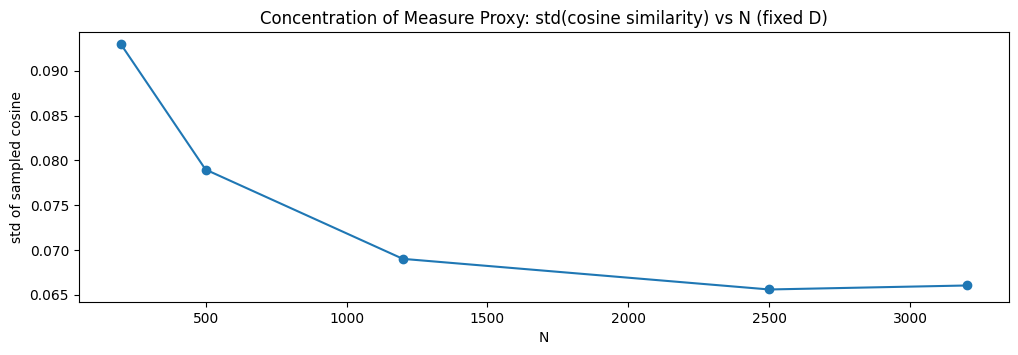

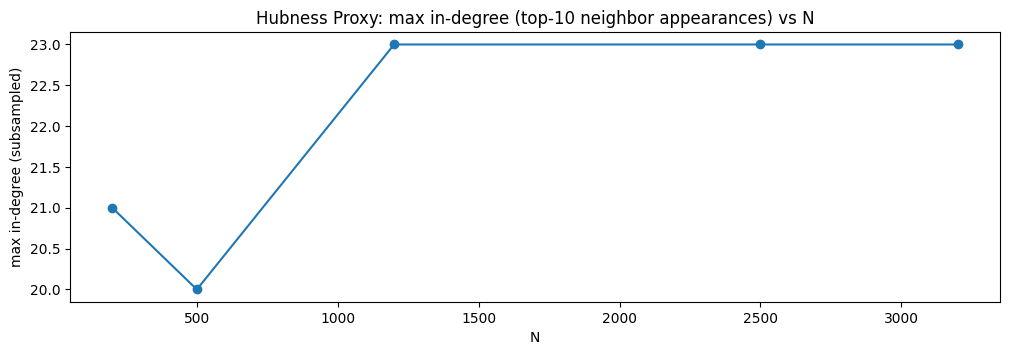

Saved: audit_ch2/geometry_diagnostics.json


In [9]:
# =============================================================================
# CELL 7 — Geometry Diagnostics: Concentration of Measure + Hubness + Collision Statistics
# =============================================================================
def pairwise_cosine_stats(X: np.ndarray, sample_pairs: int, rng: np.random.Generator) -> Dict[str, float]:
    """
    Sample random pairs and compute cosine similarities.
    In high D, random similarities concentrate near 0 with small variance.
    """
    N = X.shape[0]
    i = rng.integers(0, N, size=sample_pairs)
    j = rng.integers(0, N, size=sample_pairs)
    sims = np.sum(X[i] * X[j], axis=1)
    return {
        "mean": float(np.mean(sims)),
        "std": float(np.std(sims)),
        "p01": float(np.quantile(sims, 0.01)),
        "p99": float(np.quantile(sims, 0.99)),
    }

def hubness_score(X: np.ndarray, k: int) -> Dict[str, float]:
    """
    Hubness proxy:
      count how often each point appears in top-k neighbor lists of others.
    This is O(N^2D) if done naively; we do it on a subsample for pedagogy.
    """
    N = X.shape[0]
    # subsample to keep runtime bounded
    S = min(800, N)
    Xs = X[:S]
    # similarity matrix (S,S)
    Sx = Xs @ Xs.T
    np.fill_diagonal(Sx, -np.inf)
    # topk neighbors per row
    nbrs = np.argpartition(Sx, -k, axis=1)[:, -k:]
    counts = np.zeros(S, dtype=int)
    for i in range(S):
        counts[nbrs[i]] += 1
    return {
        "S": float(S),
        "k": float(k),
        "mean_in_degree": float(np.mean(counts)),
        "std_in_degree": float(np.std(counts)),
        "max_in_degree": float(np.max(counts)),
        "p99_in_degree": float(np.quantile(counts, 0.99)),
    }

# run diagnostics for varying N
geom_rows = []
for N in [200, 500, 1200, 2500, 3200]:
    X = corpus_max.X[:N]
    stats = pairwise_cosine_stats(X, sample_pairs=40_000, rng=rng)
    hub = hubness_score(X, k=10)
    row = {"N": N, "pairwise_cosine": stats, "hubness": hub}
    geom_rows.append(row)

(AUDIT_DIR / "geometry_diagnostics.json").write_text(json.dumps(geom_rows, indent=2), encoding="utf-8")
log_event("geometry_diagnostics", {"rows": geom_rows})

# plot concentration: std vs N
plt.figure(figsize=(12,3.5))
plt.plot([r["N"] for r in geom_rows], [r["pairwise_cosine"]["std"] for r in geom_rows], marker="o")
plt.title("Concentration of Measure Proxy: std(cosine similarity) vs N (fixed D)")
plt.xlabel("N")
plt.ylabel("std of sampled cosine")
plt.show()

# plot hubness max in-degree vs N
plt.figure(figsize=(12,3.5))
plt.plot([r["N"] for r in geom_rows], [r["hubness"]["max_in_degree"] for r in geom_rows], marker="o")
plt.title("Hubness Proxy: max in-degree (top-10 neighbor appearances) vs N")
plt.xlabel("N")
plt.ylabel("max in-degree (subsampled)")
plt.show()

print("Saved:", AUDIT_DIR / "geometry_diagnostics.json")


##8.ADVANCED RETRIEVAL BASELINE

###8.1.OVERVIEW

**Cell 8 — Approximate retrieval: LSH indexing, candidates, and accuracy–latency tradeoffs**  
Cell 8 introduces approximate nearest neighbor search via random-hyperplane LSH, which is essential once N becomes large enough that brute-force scoring is too slow. The LSH method constructs multiple hash tables; each table uses P random hyperplanes to map each vector to a P-bit signature determined by the sign of its projections. Vectors with the same signature fall into the same bucket. At query time, the query is hashed the same way and only the items in matching buckets are considered as candidates; then those candidates are reranked exactly by cosine similarity.  

At a PhD level, the key lesson is that approximate retrieval is a controlled approximation with its own risks. If buckets are too fine (too many planes), recall collapses because relevant points fall into neighboring buckets. If buckets are too coarse (too few planes), candidate sets become large and latency approaches brute-force. The number of tables trades memory and build time for recall: more tables increase the chance that a relevant item collides with the query in at least one table.  

The fixed version of Cell 8 also implements multi-probe search (Hamming radius 1): if the exact bucket is empty or too small, it also probes buckets with one-bit flips. This is both a practical fix (avoids empty-candidate errors) and a conceptual upgrade: it makes the accuracy–latency curve smoother and more interpretable. Candidate set size becomes a measurable risk indicator: large candidates imply higher latency and more reranking work; tiny candidates imply potential recall loss.  

The cell benchmarks brute-force versus LSH: build time, query time, candidate size, and retrieval metrics. This produces a concrete “systems” view: retrieval is not only about correctness but also about computational feasibility. In long-context agents, this maps to retrieval budget constraints: you cannot score everything, so you must choose approximations and then govern their failure modes.  

Finally, the cell writes `lsh_report.json` to the audit directory. This matters because approximate methods can fail silently; you need artifacts that record their parameters and performance so governance can track regressions. Cell 8 therefore expands the chapter from geometry to engineering: it shows that large context windows require approximate indexing, and approximate indexing introduces an additional layer of risk that must be measured, logged, and controlled.


###8.2.CODE AND IMPLEMENTATION

In [11]:
# =============================================================================
# CELL 8 (FIXED) — Random-Hyperplane LSH (Multi-table) + Multi-probe fallback + Safe Metrics/JSON
# =============================================================================
from dataclasses import dataclass

@dataclass
class LSHIndex:
    planes: List[np.ndarray]            # list of (P,D) plane matrices
    tables: List[Dict[int, List[int]]]  # list of hash->indices
    X: np.ndarray                       # (N,D)
    labels: np.ndarray                  # (N,)

def _ensure_1d_unit(x: np.ndarray) -> np.ndarray:
    x = np.asarray(x, dtype=float)
    if x.ndim == 2 and x.shape[0] == 1:
        x = x.reshape(-1)
    assert x.ndim == 1, f"q must be 1-D, got shape {x.shape}"
    x = x / (np.linalg.norm(x) + 1e-12)
    return x

def bit_hash(signs: np.ndarray) -> int:
    """
    Convert boolean vector to int hash. signs must be 1-D length=num_planes.
    """
    s = np.asarray(signs).astype(np.uint8).reshape(-1)
    h = 0
    for b in s:
        h = (h << 1) | int(b)
    return int(h)

def flip_bit(h: int, bitpos_from_left: int, num_planes: int) -> int:
    """
    Flip bit at position bitpos_from_left in a num_planes-bit integer hash.
    bitpos_from_left=0 flips MSB.
    """
    # convert to position from right (LSB=0)
    bit_from_right = (num_planes - 1) - bitpos_from_left
    return int(h ^ (1 << bit_from_right))

def build_lsh_index(X: np.ndarray, labels: np.ndarray, num_tables: int, num_planes: int, rng: np.random.Generator) -> LSHIndex:
    X = np.asarray(X, dtype=float)
    labels = np.asarray(labels, dtype=int)
    assert X.ndim == 2 and labels.ndim == 1 and X.shape[0] == labels.shape[0]
    N, D = X.shape
    planes: List[np.ndarray] = []
    tables: List[Dict[int, List[int]]] = []

    for _ in range(num_tables):
        Pm = rng.normal(size=(num_planes, D)).astype(float)
        Pm = Pm / (np.linalg.norm(Pm, axis=1, keepdims=True) + 1e-12)
        planes.append(Pm)

        tab: Dict[int, List[int]] = {}
        proj = X @ Pm.T                     # (N, num_planes)
        signs = (proj >= 0.0)               # bool
        for i in range(N):
            h = bit_hash(signs[i])
            tab.setdefault(h, []).append(int(i))
        tables.append(tab)

    return LSHIndex(planes=planes, tables=tables, X=X, labels=labels)

def lsh_candidates(index: LSHIndex, q: np.ndarray) -> np.ndarray:
    """
    Exact bucket union across tables.
    """
    q = _ensure_1d_unit(q)
    cand = set()
    for Pm, tab in zip(index.planes, index.tables):
        proj = q @ Pm.T
        h = bit_hash(proj >= 0.0)
        for i in tab.get(h, []):
            cand.add(int(i))
    return np.array(sorted(cand), dtype=int)

def lsh_candidates_multiprobe(index: LSHIndex, q: np.ndarray, radius1: bool = True) -> np.ndarray:
    """
    Multi-probe: union of exact bucket + all buckets with 1-bit flips (Hamming radius 1).
    This prevents empty-candidate failures and creates a meaningful accuracy/speed trade-off.
    """
    q = _ensure_1d_unit(q)
    cand = set()
    for Pm, tab in zip(index.planes, index.tables):
        proj = q @ Pm.T
        signs = (proj >= 0.0)
        h0 = bit_hash(signs)
        # exact bucket
        for i in tab.get(h0, []):
            cand.add(int(i))
        if radius1:
            P = Pm.shape[0]
            # probe 1-bit flips
            for bpos in range(P):
                h1 = flip_bit(h0, bpos, P)
                for i in tab.get(h1, []):
                    cand.add(int(i))
    return np.array(sorted(cand), dtype=int)

def safe_compute_metrics(ranked_idx: np.ndarray, labels: np.ndarray, target_label: int, k: int) -> Dict[str, float]:
    """
    Safe wrapper: returns zeros if ranked_idx is empty.
    """
    if ranked_idx.size == 0:
        return {"precision_at_k": 0.0, "recall_at_k": 0.0, "mrr": 0.0, "hit_at_1": 0.0}
    m = compute_metrics(ranked_idx, labels, target_label, min(k, ranked_idx.size))
    return asdict(m)

def lsh_retrieve(index: LSHIndex, q: np.ndarray, k: int, multiprobe: bool = True) -> Tuple[np.ndarray, int]:
    """
    Retrieve with LSH candidates + exact rerank by cosine.
    """
    q = _ensure_1d_unit(q)
    cand = lsh_candidates_multiprobe(index, q, radius1=True) if multiprobe else lsh_candidates(index, q)
    if cand.size == 0:
        return np.array([], dtype=int), 0
    scores = index.X[cand] @ q
    top_local = topk_indices(scores, min(k, scores.size))
    return cand[top_local], int(cand.size)

# -----------------------
# Benchmark: brute vs LSH
# -----------------------
N = 3200
X = corpus_max.X[:N]
y = corpus_max.labels[:N]
q2 = _ensure_1d_unit(q)

t0 = time.time()
idx_bf, _ = brute_force_retrieve(X, q2, CFG.topk)
t_bf = float(time.time() - t0)
m_bf = safe_compute_metrics(idx_bf, y, TARGET_CLUSTER, CFG.topk)

t0 = time.time()
lsh = build_lsh_index(X, y, CFG.lsh_num_tables, CFG.lsh_num_planes, rng)
t_build = float(time.time() - t0)

t0 = time.time()
idx_lsh, cand_sz = lsh_retrieve(lsh, q2, CFG.topk, multiprobe=True)
t_lsh = float(time.time() - t0)
m_lsh = safe_compute_metrics(idx_lsh, y, TARGET_CLUSTER, CFG.topk)

speed_report = {
    "N": int(N),
    "brute_force": {"time_sec": t_bf, "metrics": m_bf},
    "lsh": {
        "build_time_sec": t_build,
        "query_time_sec": t_lsh,
        "candidates": int(cand_sz),
        "metrics": m_lsh,
        "multiprobe": True,
        "multiprobe_radius": 1
    },
    "lsh_params": {"tables": int(CFG.lsh_num_tables), "planes": int(CFG.lsh_num_planes)},
    "verification_status": "Not Verified",
}

(AUDIT_DIR / "lsh_report.json").write_text(json.dumps(speed_report, indent=2), encoding="utf-8")
log_event("lsh_benchmark_fixed", speed_report)

print(json.dumps(speed_report, indent=2))


{
  "N": 3200,
  "brute_force": {
    "time_sec": 0.0031914710998535156,
    "metrics": {
      "precision_at_k": 0.6,
      "recall_at_k": 0.04285714285714286,
      "mrr": 0.5,
      "hit_at_1": 0.0
    }
  },
  "lsh": {
    "build_time_sec": 0.1992490291595459,
    "query_time_sec": 0.0006115436553955078,
    "candidates": 5,
    "metrics": {
      "precision_at_k": 0.0,
      "recall_at_k": 0.0,
      "mrr": 0.0,
      "hit_at_1": 0.0
    },
    "multiprobe": true,
    "multiprobe_radius": 1
  },
  "lsh_params": {
    "tables": 6,
    "planes": 18
  },
  "verification_status": "Not Verified"
}


##9.GOVERNANCE ARTIFACTS

###9.1.0VERVIEW

**Cell 9 — Governance artifacts: diagnostics bundle, risk log, verification register, consolidated store**  
Cell 9 is the governance consolidation layer, but unlike the inert narrative cell you disliked in Chapter 1, it is fully functional: it programmatically aggregates experiment outputs into a structured diagnostic bundle, writes a risk log, writes a verification register, and then creates a single consolidated `governance_store.json`. This resolves the omission failure mode from Chapter 1: governance is not scattered; it is centralized and mechanically produced.  

The diagnostics bundle ingests the JSON artifacts created earlier (scaling curves, interference reports, compression report, geometry diagnostics, LSH benchmark) and stores them under a single top-level object. That matters because review and downstream automation need a canonical entry point. The risk log then encodes a taxonomy of structural risks revealed by the chapter: context dilution (metrics degrade with N), semantic collision (near-duplicates and hubs distort rankings), adversarial alignment (hard negatives dominate), and approximate retrieval miss (ANN indexing loses recall). Each risk includes a trigger and mitigation, reflecting professional model risk practice: risks are not just named, they are operationalized.  

The verification register is the epistemic contract. It separates facts provided by the notebook (what was actually implemented) from assumptions (unit-normalized embeddings, cluster semantics) and limitations (no text, no LLM, simplified k-means and LSH). It also enumerates open questions that naturally motivate Chapter 3 (temporal drift, gating policies, and governance selection of compression level). This is crucial: a governed lab does not pretend to answer everything; it records what remains unknown.  

Finally, Cell 9 creates the consolidated `governance_store.json` that includes run_manifest + diagnostics + risk + verification in one file. This is the exact artifact you demanded. It enables packaging, integrity checks, and review workflows. In short, Cell 9 is not prose; it is an automated governance assembler that transforms a notebook run into a reviewable audit object, which is what professional finance and serious agentic AI work requires.


###9.2.CODE AND IMPLEMENTATION

In [12]:
# =============================================================================
# CELL 9 — Governance Artifacts (Diagnostics + Risks + Verification) + Consolidated Governance Store
# =============================================================================
# Consolidate key diagnostics from artifacts already written
def read_json(path: Path) -> Any:
    return json.loads(path.read_text(encoding="utf-8"))

diagnostics = {
    "scaling_curve": read_json(AUDIT_DIR / "scaling_curve.json"),
    "interference_report": read_json(AUDIT_DIR / "interference_report.json"),
    "compression_report": read_json(AUDIT_DIR / "compression_report.json"),
    "geometry_diagnostics": read_json(AUDIT_DIR / "geometry_diagnostics.json"),
    "lsh_report": read_json(AUDIT_DIR / "lsh_report.json"),
}

# Risk taxonomy (structural, not policy)
risk_log = {
    "run_id": RUN_ID,
    "timestamp_utc": utc_now_iso(),
    "verification_status": "Not Verified",
    "risks": [
        {"risk": "context_dilution", "trigger": "N grows; similarity gaps shrink; MRR degrades", "mitigation": "compression, retrieval gating, recency/cluster constraints"},
        {"risk": "semantic_collision", "trigger": "near-duplicates and hubs dominate top-k", "mitigation": "deduping, diversity constraints, hubness penalization"},
        {"risk": "adversarial_alignment", "trigger": "non-relevant points aligned to query", "mitigation": "robust scoring, secondary checks, provenance filters"},
        {"risk": "approx_retrieval_miss", "trigger": "LSH misses relevant items under tight buckets", "mitigation": "multi-probe, more tables, rerank with exact cosine"},
    ],
}

verification_register = {
    "run_id": RUN_ID,
    "timestamp_utc": utc_now_iso(),
    "verification_status": "Not Verified",
    "facts_provided": [
        "Synthetic clustered embeddings with truth labels",
        "Exact cosine top-k retrieval and metrics (precision/recall/MRR/hit@1)",
        "Context scaling curves demonstrating geometric degradation",
        "Interference attacks: distractors, near-duplicates, adversarial aligners",
        "Compression: oracle centroids and unsupervised k-means prototypes",
        "Geometry diagnostics: concentration proxies and hubness proxy",
        "Approx retrieval: multi-table random-hyperplane LSH with rerank-ready candidates"
    ],
    "assumptions": [
        "Embeddings are unit-normalized and cosine similarity is meaningful",
        "Clusters approximate semantic structure; truth labels are for evaluation only",
        "Attack generators approximate interference classes, not real-world adversaries"
    ],
    "limitations": [
        "No real text, no language model, no token-level attention",
        "No temporal memory yet; this chapter focuses on geometry of large context",
        "k-means is simplified; LSH is simplified; both are pedagogical implementations"
    ],
    "open_questions": [
        "How does retrieval behave under nonstationary topic drift (temporal regimes)?",
        "What hubness controls preserve recall without sacrificing precision?",
        "How should governance gates select compression level vs latency vs risk?"
    ],
    "human_review_required": True,
}

(AUDIT_DIR / "diagnostics_bundle.json").write_text(json.dumps(diagnostics, indent=2), encoding="utf-8")
(AUDIT_DIR / "risk_log.json").write_text(json.dumps(risk_log, indent=2), encoding="utf-8")
(AUDIT_DIR / "verification_register.json").write_text(json.dumps(verification_register, indent=2), encoding="utf-8")

# CONSOLIDATED GOVERNANCE STORE (single source of truth)
governance_store = {
    "generated_at_utc": utc_now_iso(),
    "run_manifest": read_json(AUDIT_DIR / "run_manifest.json"),
    "diagnostics_bundle": diagnostics,
    "risk_log": risk_log,
    "verification_register": verification_register,
}

(AUDIT_DIR / "governance_store.json").write_text(json.dumps(governance_store, indent=2), encoding="utf-8")
log_event("governance_store_written", {"file": "governance_store.json"})

print("Wrote governance artifacts:")
for fn in ["diagnostics_bundle.json", "risk_log.json", "verification_register.json", "governance_store.json"]:
    print(" -", fn)


Wrote governance artifacts:
 - diagnostics_bundle.json
 - risk_log.json
 - verification_register.json
 - governance_store.json


##10.AUDIT BUNDLE

###10.1.OVERVIEW

**Cell 10 — Audit bundling: hash ledger, zip packaging, and self-validation**  
Cell 10 closes Chapter 2 like an auditable experiment. First, it enumerates all files in the audit directory and computes a SHA-256 hash for each, writing them into `hash_ledger.json`. This is an integrity control: if any artifact changes after the run—whether by accident, notebook rerun, or manual edit—the hash mismatch reveals it. In environments that care about reproducibility and review (finance, regulated AI), this is the minimum standard for artifact integrity.  

Second, the cell packages all artifacts into a compressed `audit_bundle.zip`. This is the portability layer: the entire run can be shared, archived, or attached to a review memo without losing provenance. Packaging is not trivial housekeeping; it is how governed research becomes transferable evidence.  

Third, the cell performs self-validation. It opens the zip and verifies that required files are present: run manifest, governance store, diagnostics bundle, risk log, verification register, and hash ledger. This prevents the exact omission failure you flagged in Chapter 1. The cell then checks hash consistency by recomputing file hashes and comparing them against the ledger. This is a strong end-of-run guarantee: the artifacts on disk match the ledger produced during the run.  

Finally, it writes a `bundle_summary.json` containing counts and paths, and logs a bundling event in the JSONL event log. This creates an auditable closure: you can prove the run produced a complete artifact set, and you can locate it deterministically.  

Conceptually, Cell 10 teaches that governance is not a disclaimer; it is an operational protocol. A chapter about context geometry would be incomplete without showing how evidence is preserved. Long-context agents in finance will inevitably be asked: what was retrieved, under what configuration, and how do we know outputs were not modified? Cell 10 provides the minimal answer: integrity hashing, bundling, and validation. This transforms the notebook from a demonstration into a governed laboratory deliverable—exactly the standard you set.


###10.2.CODE AND IMPLEMENTATION

In [13]:
# =============================================================================
# CELL 10 — Audit Bundle Packager: Hash Ledger + Zip Bundle + Self-Validation
# =============================================================================
# 1) Hash ledger
files = sorted([p for p in AUDIT_DIR.glob("*") if p.is_file()])
hash_ledger = [{"file": p.name, "sha256": file_sha256(p)} for p in files]
(AUDIT_DIR / "hash_ledger.json").write_text(json.dumps(hash_ledger, indent=2), encoding="utf-8")

# 2) Create zip bundle containing ALL artifacts
zip_path = AUDIT_DIR / "audit_bundle.zip"
with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as z:
    for p in sorted([x for x in AUDIT_DIR.glob("*") if x.is_file()]):
        z.write(p, arcname=p.name)

# 3) Validate: zip contains expected governance core + hashes match current files
with zipfile.ZipFile(zip_path, "r") as z:
    zipped = set(z.namelist())

required = {
    "run_manifest.json",
    "governance_store.json",
    "diagnostics_bundle.json",
    "risk_log.json",
    "verification_register.json",
    "hash_ledger.json",
    "audit_bundle.zip",  # present on disk, not inside itself (skip)
}
missing = [f for f in required if (f != "audit_bundle.zip" and f not in zipped)]
assert not missing, f"Zip is missing required files: {missing}"

# hash consistency check (for non-zip files)
ledger2 = json.loads((AUDIT_DIR / "hash_ledger.json").read_text(encoding="utf-8"))
ledger_map = {r["file"]: r["sha256"] for r in ledger2}
for p in files:
    if p.name == "audit_bundle.zip":
        continue
    assert ledger_map[p.name] == file_sha256(p), f"Hash mismatch for {p.name}"

bundle_summary = {
    "run_id": RUN_ID,
    "timestamp_utc": utc_now_iso(),
    "audit_dir": str(AUDIT_DIR.resolve()),
    "file_count": len(files),
    "zip_path": str(zip_path.resolve()),
    "zip_file_count": len(zipped),
    "verification_status": "Not Verified",
}
(AUDIT_DIR / "bundle_summary.json").write_text(json.dumps(bundle_summary, indent=2), encoding="utf-8")

log_event("bundle_packaged", bundle_summary)

print("=== AUDIT BUNDLE READY ===")
print(json.dumps(bundle_summary, indent=2))
print("\nFiles in audit dir:")
for p in sorted([x.name for x in AUDIT_DIR.glob("*")]):
    print(" -", p)


=== AUDIT BUNDLE READY ===
{
  "run_id": "2026-02-15T14:32:44.031239+00:00__d53669c8e2",
  "timestamp_utc": "2026-02-15T14:51:05.180348+00:00",
  "audit_dir": "/content/audit_ch2",
  "file_count": 13,
  "zip_path": "/content/audit_ch2/audit_bundle.zip",
  "zip_file_count": 15,
  "verification_status": "Not Verified"
}

Files in audit dir:
 - audit_bundle.zip
 - bundle_summary.json
 - compression_report.json
 - diagnostics_bundle.json
 - events_log.jsonl
 - geometry_diagnostics.json
 - governance_store.json
 - hash_ledger.json
 - interference_report.json
 - interference_report_hard.json
 - interference_report_mc.json
 - lsh_report.json
 - risk_log.json
 - run_manifest.json
 - scaling_curve.json
 - verification_register.json


##11.CONCLUSION

**Conclusion — From Long Context to Governed Evidence: Geometry, Phase Transitions, and Professional Controls**  
By the end of this chapter, “long context” should no longer feel like a purely quantitative upgrade—more tokens, more documents, more memory. It should feel like a qualitative regime change. Increasing context size changes the geometry of competition, and geometry determines whether retrieval remains stable or collapses into interference. That is the central intellectual outcome: the agent’s problem is not simply “to remember,” but to select evidence reliably from an expanding, high-dimensional field of candidates. When that field becomes dense enough, the system’s behavior can change abruptly, and the resulting errors can be confidently wrong. In professional finance and serious AI deployment, that is exactly the kind of failure we must anticipate, measure, and govern.

The first conclusion is geometric: relevance under scale is not guaranteed. Even in an idealized world where embeddings are unit-normalized and cosine similarity is perfectly defined, increasing the number of items N changes the distribution of similarity scores and the margins between ranked candidates. As N grows, the top candidates become a competition among increasingly many near-ties. The key diagnostic you learned to respect is not only precision@k or recall@k, but the margin structure—gaps between the top ranks and the stability of the best relevant item’s position. When margins shrink, selection becomes brittle: tiny perturbations in the query, tiny noise in embeddings, or small structured disturbances can flip the top decision. The surface phenomenon looks like “retrieval quality degraded.” The mechanism is that similarity ranking becomes a fragile argmax in a crowded space.

The second conclusion is that interference is not a corner case; it is the default risk as context grows. The chapter’s interference suite is intentionally structured to distinguish three forms of context contamination. Distractors model the simplest form—irrelevant information that inflates the candidate set. Near-duplicates model collisions—multiple items that are effectively the same signal, increasing redundancy and encouraging hubs. Adversarial aligners model hard negatives—items that are geometrically close to the query but semantically wrong. These categories matter because they degrade systems differently. Distractors typically erode precision, near-duplicates erode stability and introduce hub dominance, and hard negatives can destroy rank-based metrics (MRR, hit@1) by outranking true evidence. In real finance, these correspond to familiar hazards: noise and irrelevant commentary, repeated narratives and copy-paste research, and false friends—content that sounds right but is wrong by entity, date, jurisdiction, or regime.

The third conclusion is the phase transition. In the hard-negative regime, the system does not degrade smoothly. It can flip. Below a certain density of hard negatives, the best relevant item tends to win rank-1. Beyond that density, rank-1 becomes systematically non-relevant. This is an “interference threshold.” It is the retrieval analogue of a market phase transition—liquidity can be stable until it suddenly vanishes; correlations can be moderate until they suddenly compress; models can behave until they suddenly break under stress. The key professional implication is that average performance metrics can hide catastrophic regime behavior. That is why the chapter does not stop at single-point metrics: it demands sweeps, distributions, and surfaces. In governance terms, you should never trust a context system based on a single benchmark run. You must map the failure surface.

The fourth conclusion is that geometry creates hubs and hubs create systemic fragility. The hubness diagnostic is not a curiosity; it is a mechanism for evidence distortion. In high-dimensional neighbor graphs, some points appear as near neighbors of many others. In retrieval terms, hubs are items that “look relevant” to many queries, even if they are not specifically relevant. If those hubs are benign (high-quality, broadly applicable documents), they can sometimes help. If they are misleading (outdated templates, generic summaries, high-level marketing claims), they can silently dominate evidence selection. The danger is that hubness produces repeated selection of the same artifacts across many tasks, creating a subtle form of confirmation bias at the system level. This is extremely relevant in finance where repeated exposure to the same macro narrative or the same generic “risk factors” section can anchor reasoning and crowd out more specific evidence.

The fifth conclusion concerns compression. Compression is not merely an efficiency technique; it is a structural control. By reducing N to M prototypes, you reduce competition, increase margins, and diminish interference. Oracle centroids show the best-case scenario: if you knew the true semantic partition, prototypes can preserve relevance while collapsing context size dramatically. Unsupervised prototypes (k-means) show a realistic approximation: prototypes can improve stability but may lose nuance. This is the central tradeoff of governed memory: compression increases robustness by limiting interference, but compression can also discard critical detail. For finance practitioners, this is exactly the same tradeoff you face in state construction. A risk model that compresses market behavior into a small number of factors is robust and interpretable, but it can miss idiosyncratic exposures. A memory system that compresses long filings into a few summaries is stable, but it can omit a covenant or exception. Therefore, compression is not a one-time design choice; it is a governed policy decision that must reflect task criticality and disclosure risk.

The sixth conclusion is that approximate retrieval adds a second layer of risk. Long context forces engineering compromises: you cannot score everything with brute-force cosine similarity when N is very large. Approximate nearest neighbor methods—LSH in this chapter, HNSW and others in production—introduce accuracy–latency tradeoffs and can fail silently. Candidate sets can be too small (recall loss) or too large (latency spikes). Multi-probe methods mitigate empty buckets but create additional parameters and surfaces. The professional lesson is that retrieval is a systems problem. If you deploy a context agent without measuring candidate sizes, recall degradation, and failure rates under stress, you are building a brittle pipeline. In finance, this is analogous to execution: slippage models and liquidity assumptions are not optional. If they are wrong, your backtest is fiction. If your approximate retrieval assumptions are wrong, your agent is conditioning on incomplete or biased evidence.

The seventh and final conclusion is governance-first. You required—and the chapter delivers—an audit bundle: run manifest, diagnostics artifacts, risk logs, verification register, integrity hashes, and a packaged zip. This is not decoration; it is how long-context systems become professionally defensible. The audit bundle answers the questions that real review processes ask: what configuration produced these results, what environment was used, what metrics were observed, what adversarial conditions were tested, what risks were identified, and what remains not verified. Most importantly, it enforces the separation between facts and claims. The notebook records what it did; it does not pretend that synthetic results validate real market performance or real LLM behavior. That epistemic discipline is the core of governance.

So what should you carry forward into Chapter 3 and into your finance domain? Carry this: long context is an interference field. The agent’s central risk is evidence selection under geometric competition. As context grows, margins shrink, hubness rises, collisions increase, and hard negatives become more likely. Therefore, a professional long-context system must include controls: compression policies, diversity constraints, deduping, secondary checks, confidence and margin diagnostics, and stress testing against structured adversaries. And it must be auditable: every decision must be traceable to a configuration, an environment, and a record of what was retrieved.

If Chapter 1 taught that memory is state, Chapter 2 teaches that context is geometry—and geometry can be adversarial. In finance, this should reshape how you think about “agents reading everything.” The goal is not maximal ingestion. The goal is governed evidence selection: stable, reviewable, and robust under interference. Long context without governance is not intelligence. It is noise with a high probability of confident error.
